In [2]:
from elexon import ElexonRawClient
from calendar import monthrange
import datetime
import numpy as np
import pandas as pd
from tabulate import tabulate
from tqdm import tqdm
from sys import exit
from tqdm import tqdm
import os
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

In [3]:
SoilTemperature = pd.read_csv("0.DataSource/SheffieldSoilTemperature/SheffieldSoilTemperature.csv")
SoilTemperature['ObservationTime'] = pd.to_datetime(SoilTemperature['ObservationTime'],format="%d/%m/%Y %H:%M")
SoilTemperature['Year'],SoilTemperature['Month'],SoilTemperature['Day'] = SoilTemperature['ObservationTime'].dt.year,\
            SoilTemperature['ObservationTime'].dt.month,SoilTemperature['ObservationTime'].dt.day
SoilTemperature

,ObservationTime,q5cm_soil_temp,q10cm_soil_temp,q20cm_soil_temp,q30cm_soil_temp,q50cm_soil_temp,q100cm_soil_temp,Year,Month,Day
0,2000-01-01 09:00:00,NaN,NaN,NaN,4.3,NaN,5.8,2000,1,1
1,2000-01-02 09:00:00,NaN,NaN,NaN,3.1,NaN,5.7,2000,1,2
2,2000-01-03 09:00:00,NaN,NaN,NaN,3.7,NaN,5.4,2000,1,3
3,2000-01-04 09:00:00,NaN,NaN,NaN,3.9,NaN,5.6,2000,1,4
4,2000-01-05 09:00:00,NaN,NaN,NaN,3.7,NaN,5.6,2000,1,5
...,...,...,...,...,...,...,...,...,...,...
3038,2008-09-26 09:00:00,NaN,NaN,NaN,15.5,NaN,15.6,2008,9,26
3039,2008-09-27 09:00:00,NaN,NaN,NaN,15.1,NaN,15.5,2008,9,27
3040,2008-09-28 09:00:00,NaN,NaN,NaN,15.0,NaN,15.5,2008,9,28
3041,2008-09-29 09:00:00,NaN,NaN,NaN,14.7,NaN,15.4,2008,9,29


In [4]:
SoilTemperature

,ObservationTime,q5cm_soil_temp,q10cm_soil_temp,q20cm_soil_temp,q30cm_soil_temp,q50cm_soil_temp,q100cm_soil_temp,Year,Month,Day
0,2000-01-01 09:00:00,NaN,NaN,NaN,4.3,NaN,5.8,2000,1,1
1,2000-01-02 09:00:00,NaN,NaN,NaN,3.1,NaN,5.7,2000,1,2
2,2000-01-03 09:00:00,NaN,NaN,NaN,3.7,NaN,5.4,2000,1,3
3,2000-01-04 09:00:00,NaN,NaN,NaN,3.9,NaN,5.6,2000,1,4
4,2000-01-05 09:00:00,NaN,NaN,NaN,3.7,NaN,5.6,2000,1,5
...,...,...,...,...,...,...,...,...,...,...
3038,2008-09-26 09:00:00,NaN,NaN,NaN,15.5,NaN,15.6,2008,9,26
3039,2008-09-27 09:00:00,NaN,NaN,NaN,15.1,NaN,15.5,2008,9,27
3040,2008-09-28 09:00:00,NaN,NaN,NaN,15.0,NaN,15.5,2008,9,28
3041,2008-09-29 09:00:00,NaN,NaN,NaN,14.7,NaN,15.4,2008,9,29


In [5]:
PivotTbl = pd.pivot_table(SoilTemperature, values='q100cm_soil_temp', index='Month',columns='Year')
PivotTbl

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008
Month,,,,,,,,,
1,5.419355,5.622581,5.593548,6.383871,6.200000,6.441935,6.083871,NaN,6.887097
2,5.917241,4.932143,6.635714,5.225000,6.406897,6.046429,5.532143,6.132143,6.093103
3,6.958065,5.219355,6.767742,6.116129,6.041935,6.067742,5.017647,7.177419,6.329032
4,7.660714,7.173333,8.890000,8.343333,8.560000,8.786667,NaN,9.186667,7.523333
5,11.586207,10.258065,11.319355,11.067742,11.629032,11.719355,10.760000,12.061290,11.277419
6,14.016667,13.306667,14.043333,14.546667,14.286667,14.753333,NaN,14.243333,14.066667
7,15.250000,15.525806,15.419355,16.103226,15.193548,17.448387,17.064516,15.616129,15.735484
8,16.548387,16.461290,16.903226,17.261290,17.151613,17.138710,17.600000,16.522581,17.125806
9,15.633333,15.323333,16.196667,15.740000,16.196667,16.480000,NaN,15.866667,16.183333


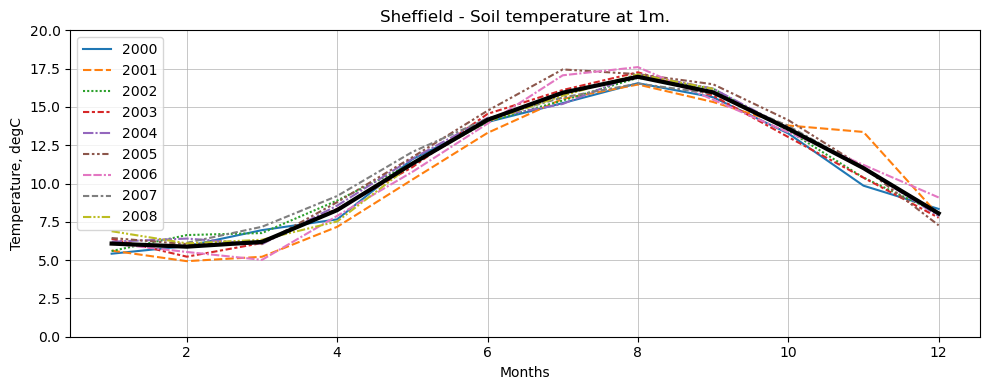

In [7]:
plt.figure(figsize=(10,4))
sns.lineplot(data=PivotTbl)
sns.lineplot(data=PivotTbl.mean(axis=1),linewidth=3,dashes=False,color='black')
plt.title(f"Sheffield - Soil temperature at 1m.")
plt.xlabel("Months")
plt.ylabel("Temperature, degC")
plt.ylim(0,20)
plt.grid(which='both',linewidth = 0.5)
plt.legend(loc='best')
plt.tight_layout()

In [13]:
PivotTbl.mean(axis=1)

Month
1      6.079032
2      5.880090
3      6.188341
4      8.265506
5     11.297607
6     14.157917
7     15.928495
8     16.968100
9     15.952500
10    13.576498
11    11.006667
12     8.050320
dtype: float64

In [23]:
temp = {1:6.079032,2:5.880090,3:6.188341,4:8.265506,5:11.297607,6:14.157917,
        7:15.928495,8:16.968100,9:15.952500,10:13.576498,11:11.006667,12:8.050320}

In [24]:
temp

{1: 6.079032,
 2: 5.88009,
 3: 6.188341,
 4: 8.265506,
 5: 11.297607,
 6: 14.157917,
 7: 15.928495,
 8: 16.9681,
 9: 15.9525,
 10: 13.576498,
 11: 11.006667,
 12: 8.05032}